In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data is taken from the kaggle website. It is a classification dataset which contatins the information about loan and gives an output of 1 or 0 for approval and rejection of the loan respectively.

In [2]:
# Read CSV as pandas data frame
import pandas as pd
df=pd.read_csv('/content/loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


After the data is read, exploratory data analysis is conducted

In [ ]:
df.shape

(45000, 14)

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Checking the data for avalibility of any NULL values.

In [ ]:
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


The categorical values are changed into numerical by giving them codes.


In [3]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes


Feature selection is carried after the categorical values are taken into numerical.

In [4]:
correlation_matrix = df.corr()
target_corr = correlation_matrix['loan_status'].abs()  # Get absolute correlations with target
selected_features = target_corr[target_corr > 0.1].index.tolist()  # Threshold = 0.1
print("Selected Features Based on Correlation:", selected_features)

# Keep only the selected features
X = df[selected_features].drop('loan_status', axis=1)
y = df['loan_status']

Selected Features Based on Correlation: ['person_income', 'person_home_ownership', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file', 'loan_status']


Dimensionality reduction using PCA

In [5]:
X_centered = X - X.mean()
X_scaled = X_centered / X.std()

# Compute covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(-eigen_values)  # Descending order
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

# Calculate explained variance
explained_variance_ratio = eigen_values / eigen_values.sum()
print("Explained Variance Ratio:", explained_variance_ratio)

# Retain components that explain 95% variance
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

# Reduce dimensions
X_reduced = np.dot(X_scaled, eigen_vectors[:, :n_components])

Explained Variance Ratio: [0.29024416 0.23791337 0.17178012 0.1380473  0.12324211 0.03877294]
Number of components to retain 95% variance: 5


Univariate Analysis

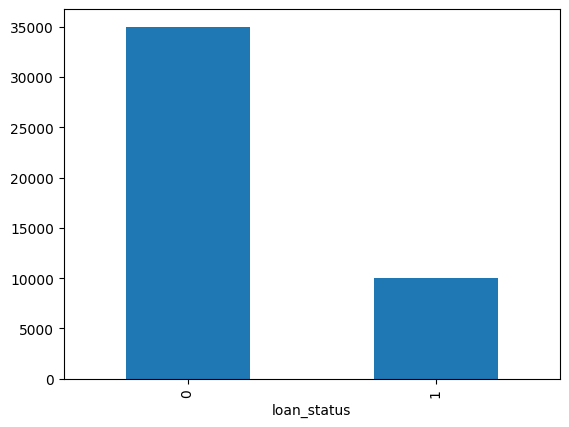

In [6]:
#Univariate Anlysis
df['loan_status'].value_counts().plot(kind='bar')
plt.show()

Multivariate Analysis


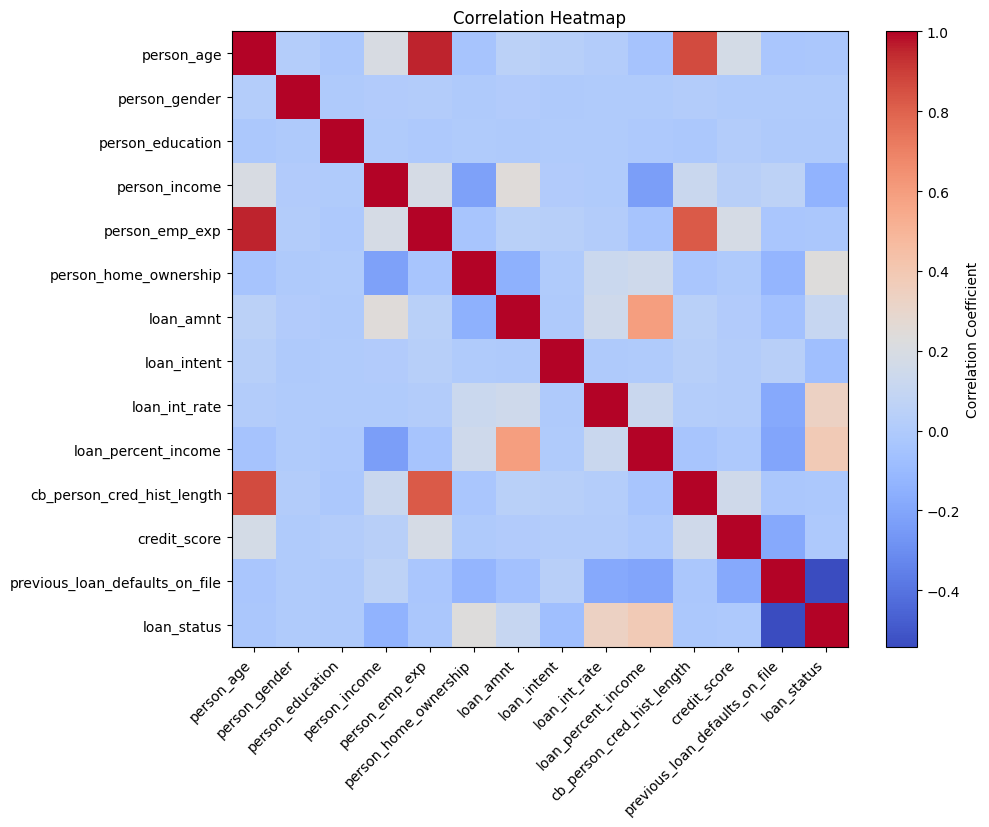

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

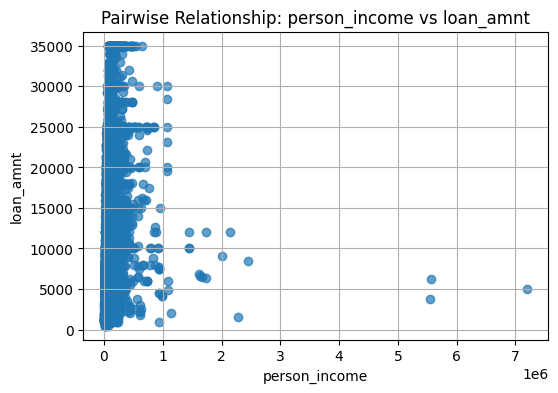

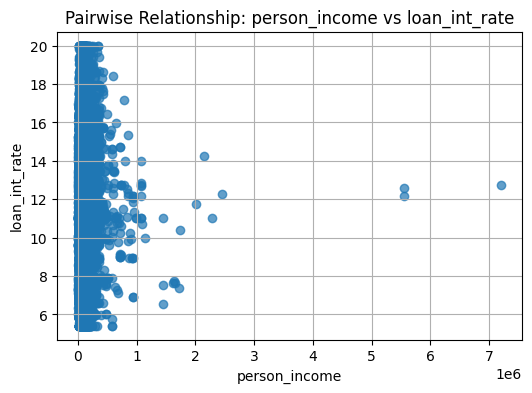

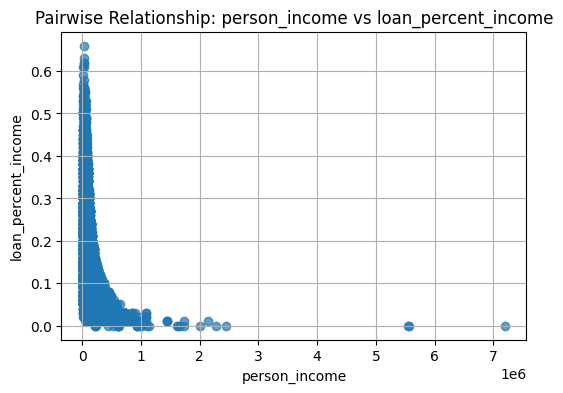

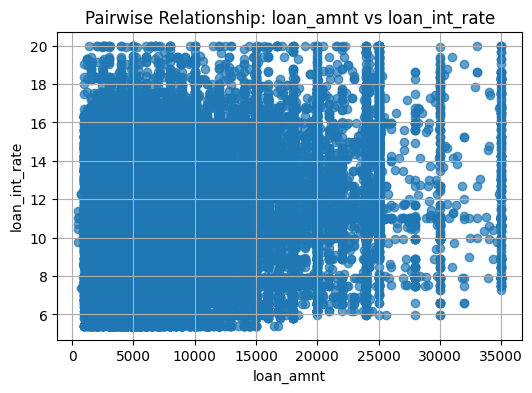

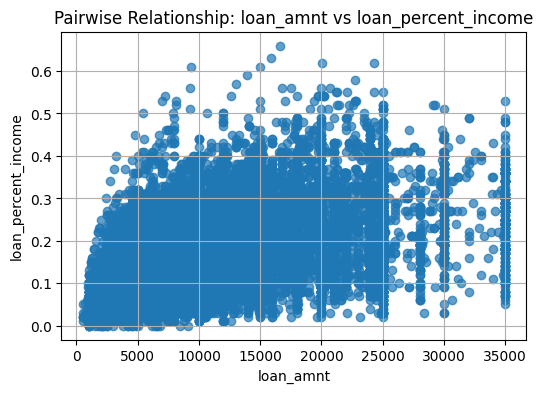

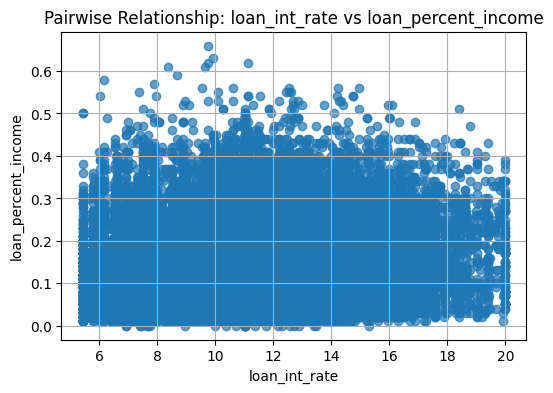

In [8]:
# Example: Select a subset of columns
columns_to_analyze = ['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

# Create pairwise scatter plots
for i, x in enumerate(columns_to_analyze):
    for j, y in enumerate(columns_to_analyze):
        if i < j:
            plt.figure(figsize=(6, 4))
            plt.scatter(df[x], df[y], alpha=0.7)
            plt.title(f"Pairwise Relationship: {x} vs {y}")
            plt.xlabel(x)
            plt.ylabel(y)
            plt.grid(True)
            plt.show()


Standardization, Normalization and splitting into test and train data


In [12]:
# Normalize the data
X = df.drop('loan_status', axis=1).values  # Replace 'target_column_name' with actual column name
y = df['loan_status'].values

# Adding intercept term
X = np.insert(X, 0, 1, axis=1)

# Ensure all columns are numeric before normalization
X = X.astype(np.float64)  # Convert all columns to float64

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Splitting data into training and test sets
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
split = int(0.7 * len(indices))

X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]


<ipython-input-12-9c41d54d5f9b>:12: RuntimeWarning: invalid value encountered in divide
  X = (X - X.mean(axis=0)) / X.std(axis=0)


Building the models without sklearn

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.01, epochs=1000):
    weights = np.zeros(X.shape[1])

    for epoch in range(epochs):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        errors = y - predictions
        gradient = np.dot(X.T, errors)
        weights += lr * gradient

    return weights

# Train the model
weights = logistic_regression(X_train, y_train)

# Prediction
def predict(X, weights):
    z = np.dot(X, weights)
    return [1 if i > 0.5 else 0 for i in sigmoid(z)]

y_pred = predict(X_test, weights)


In [14]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

def build_tree(X, y, depth=0, max_depth=10):
    num_samples_per_class = [np.sum(y == i) for i in np.unique(y)]
    predicted_class = np.argmax(num_samples_per_class)
    node = Node(predicted_class=predicted_class)

    # Stopping criteria
    if depth < max_depth:
        idx, thr = best_split(X, y)
        if idx is not None:
            indices_left = X[:, idx] < thr
            X_left, y_left = X[indices_left], y[indices_left]
            X_right, y_right = X[~indices_left], y[~indices_left]
            node.feature_index = idx
            node.threshold = thr
            node.left = build_tree(X_left, y_left, depth + 1, max_depth)
            node.right = build_tree(X_right, y_right, depth + 1, max_depth)
    return node

# This function needs a `best_split` method that finds the best split, which is complex to implement from scratch.


In [15]:
def perceptron(X, y, lr=0.01, epochs=1000):
    weights = np.zeros(X.shape[1])

    for epoch in range(epochs):
        for xi, target in zip(X, y):
            update = lr * (target - step(np.dot(xi, weights)))
            weights += update * xi
    return weights

def step(z):
    return 1 if z >= 0 else 0

weights = perceptron(X_train, y_train)
y_pred_perceptron = predict(X_test, weights)


In [17]:
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

def precision_recall_f1(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1


In [18]:
# Logistic Regression Evaluation
y_pred_train_lr = predict(X_train, weights)
y_pred_test_lr = predict(X_test, weights)

acc_train_lr = accuracy(y_train, y_pred_train_lr)
acc_test_lr = accuracy(y_test, y_pred_test_lr)
prec_train_lr, recall_train_lr, f1_train_lr = precision_recall_f1(y_train, y_pred_train_lr)
prec_test_lr, recall_test_lr, f1_test_lr = precision_recall_f1(y_test, y_pred_test_lr)


# Perceptron Evaluation
y_pred_train_p = predict(X_train, weights)
y_pred_test_p = predict(X_test, weights)

acc_train_p = accuracy(y_train, y_pred_train_p)
acc_test_p = accuracy(y_test, y_pred_test_p)
prec_train_p, recall_train_p, f1_train_p = precision_recall_f1(y_train, y_pred_train_p)
prec_test_p, recall_test_p, f1_test_p = precision_recall_f1(y_test, y_pred_test_p)

# Print results
print("Logistic Regression Train/Test Accuracy: {:.2f}/{:.2f}".format(acc_train_lr, acc_test_lr))
print("Perceptron Train/Test Accuracy: {:.2f}/{:.2f}".format(acc_train_p, acc_test_p))


Logistic Regression Train/Test Accuracy: 0.78/0.78
Perceptron Train/Test Accuracy: 0.78/0.78


In [19]:
class DecisionNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def build_decision_tree(X, y, depth=0, max_depth=10):
    num_samples, num_features = X.shape
    if depth == max_depth or num_samples <= 1:
        leaf_value = np.bincount(y).argmax()
        return DecisionNode(value=leaf_value)

    feature_idxs = np.random.choice(num_features, num_features, replace=False)
    best_feature, best_threshold = None, None
    best_gain = -1
    for feature_index in feature_idxs:
        threshold = np.median(X[:, feature_index])
        left_idxs, right_idxs = X[:, feature_index] < threshold, X[:, feature_index] >= threshold
        if len(set(y[left_idxs])) == 1 or len(set(y[right_idxs])) == 1:
            continue
        gain = information_gain(y, left_idxs, right_idxs)
        if gain > best_gain:
            best_gain, best_feature, best_threshold = gain, feature_index, threshold

    if best_gain == -1:
        leaf_value = np.bincount(y).argmax()
        return DecisionNode(value=leaf_value)

    left_idxs, right_idxs = X[:, best_feature] < best_threshold, X[:, best_feature] >= best_threshold
    left = build_decision_tree(X[left_idxs], y[left_idxs], depth + 1, max_depth)
    right = build_decision_tree(X[right_idxs], y[right_idxs], depth + 1, max_depth)
    return DecisionNode(feature_index=best_feature, threshold=best_threshold, left=left, right=right)

def predict_decision_tree(node, sample):
    while node.value is None:
        if sample[node.feature_index] < node.threshold:
            node = node.left
        else:
            node = node.right
    return node.value

def predict_tree(X, node):
    return [predict_decision_tree(node, xi) for xi in X]

def information_gain(y, left_idxs, right_idxs):
    # Information gain calculation here
    pass


In [20]:
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

def precision_recall_f1(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1


In [21]:
import numpy as np

def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

def precision_recall_f1(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

def print_scores(y_true, y_pred):
    # Calculate accuracy
    acc = accuracy(y_true, y_pred)

    # Calculate precision, recall, and f1 score
    precision, recall, f1 = precision_recall_f1(y_true, y_pred)

    # Print the scores
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

# Example usage:
# Assuming y_true and y_pred are your true and predicted labels arrays
y_true = np.array([0, 1, 1, 0, 1])  # Example true labels
y_pred = np.array([0, 1, 0, 0, 1])  # Example predictions

# Call the function to print the scores
print_scores(y_true, y_pred)


Accuracy: 0.80
Precision: 1.00
Recall: 0.67
F1 Score: 0.80


with sklearn

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/loan_data.csv')

# Assume 'target' is the name of the target variable
X = data.drop('loan_status', axis=1)  # Replace 'target' with your actual target column name
y = data['loan_status']

# Convert categorical variables using get_dummies
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
logistic_pred = logistic_model.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10493
           1       0.77      0.75      0.76      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.85     13500
weighted avg       0.89      0.89      0.89     13500



In [24]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
tree_pred = tree_model.predict(X_test_scaled)
print("Decision Tree Classification Report:")
print(classification_report(y_test, tree_pred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10493
           1       0.77      0.78      0.78      3007

    accuracy                           0.90     13500
   macro avg       0.85      0.86      0.86     13500
weighted avg       0.90      0.90      0.90     13500



In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
forest_pred = forest_model.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, forest_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.89      0.76      0.82      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.92      0.93      0.92     13500



In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [27]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')

    # Test metrics
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Model: {model.__class__.__name__}")
    print("Training Metrics:")
    print(f"Accuracy: {accuracy_train:.2f}, Precision: {precision_train:.2f}, Recall: {recall_train:.2f}, F1-Score: {f1_train:.2f}")
    print("Testing Metrics:")
    print(f"Accuracy: {accuracy_test:.2f}, Precision: {precision_test:.2f}, Recall: {recall_test:.2f}, F1-Score: {f1_test:.2f}")
    print("\n")


In [28]:
# Evaluate Logistic Regression
evaluate_model(logistic_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Evaluate Decision Tree
evaluate_model(tree_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Evaluate Random Forest
evaluate_model(forest_model, X_train_scaled, y_train, X_test_scaled, y_test)


Model: LogisticRegression
Training Metrics:
Accuracy: 0.90, Precision: 0.90, Recall: 0.90, F1-Score: 0.90
Testing Metrics:
Accuracy: 0.89, Precision: 0.89, Recall: 0.89, F1-Score: 0.89


Model: DecisionTreeClassifier
Training Metrics:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Testing Metrics:
Accuracy: 0.90, Precision: 0.90, Recall: 0.90, F1-Score: 0.90


Model: RandomForestClassifier
Training Metrics:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Testing Metrics:
Accuracy: 0.93, Precision: 0.92, Recall: 0.93, F1-Score: 0.92




In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_and_select_model(models, X_train, y_train, X_test, y_test, business_criteria):
    model_performance = {}
    for model in models:
        name = model.__class__.__name__
        # Training the model
        model.fit(X_train, y_train)

        # Predicting the train and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculating performance metrics
        metrics = {
            'train_accuracy': accuracy_score(y_train, y_train_pred),
            'test_accuracy': accuracy_score(y_test, y_test_pred),
            'train_precision': precision_score(y_train, y_train_pred, average='weighted'),
            'test_precision': precision_score(y_test, y_test_pred, average='weighted'),
            'train_recall': recall_score(y_train, y_train_pred, average='weighted'),
            'test_recall': recall_score(y_test, y_test_pred, average='weighted'),
            'train_f1': f1_score(y_train, y_train_pred, average='weighted'),
            'test_f1': f1_score(y_test, y_test_pred, average='weighted')
        }
        model_performance[name] = metrics

    # Decision logic based on business criteria
    if business_criteria == 'accuracy':
        best_model = max(model_performance, key=lambda x: model_performance[x]['test_accuracy'])
    elif business_criteria == 'precision':
        best_model = max(model_performance, key=lambda x: model_performance[x]['test_precision'])
    elif business_criteria == 'recall':
        best_model = max(model_performance, key=lambda x: model_performance[x]['test_recall'])
    elif business_criteria == 'f1_score':
        best_model = max(model_performance, key=lambda x: model_performance[x]['test_f1'])
    else:
        best_model = max(model_performance, key=lambda x: model_performance[x]['test_accuracy'])

    print("Based on the chosen business criteria of {}, the best model is: {}".format(business_criteria, best_model))
    print("Performance Metrics:")
    for metric, value in model_performance[best_model].items():
        print(f"{metric}: {value:.4f}")

    return model_performance, best_model

# Example usage
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
logistic_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()

# List of models
models = [logistic_model, tree_model, forest_model]

# Define your business criteria (e.g., 'accuracy', 'precision', 'recall', 'f1_score')
business_criteria = 'accuracy'

# Call the function
model_performance, best_model = evaluate_and_select_model(models, X_train_scaled, y_train, X_test_scaled, y_test, business_criteria)


Based on the chosen business criteria of accuracy, the best model is: RandomForestClassifier
Performance Metrics:
train_accuracy: 1.0000
test_accuracy: 0.9282
train_precision: 1.0000
test_precision: 0.9268
train_recall: 1.0000
test_recall: 0.9282
train_f1: 1.0000
test_f1: 0.9264
